https://archive.ics.uci.edu/ml/datasets/Air+Quality

S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import re  # For problems 3 and 4 listed below

Quite a few issues with the .csv read-in.  Instead of fixing it with SQL lets do it in Python here.

1. Two extra columns at end
2. Date is auto-read as an object
3. Time is an object and in a weird format, can't just use int()
4. CO(GT), C6H6(GT), T, RH, and AH all use commas as decimals
5. Missing vals?

In [210]:
# All Time are in format of xx.00.00 so a simple regex can replace these all easily
def fixTime(timeGiven):
    return re.sub("\.00\.00", "", timeGiven)

# The problematic commas can all be replaced with a simple regex as well
def fixCommas(numberGiven):
    return re.sub(",", ".", numberGiven)

In [211]:
usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]  # There are two extra blank columns in the csv, this gets rid of them.
df = pd.read_csv(os.getcwd() + r'/data/AirQualityUCI.csv', 
                 delimiter=';', usecols=usecols)
df = df[~df['Time'].isna()] # Remove the large amount NaN rows - these were empty in the original data
df['Time'] = df['Time'].apply(fixTime) 
df = df.astype({'Time':'int32'}, copy=False) # From string to int32
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Set 'Date' to actually be datetime with format
df['dTime'] = df['Date'] + pd.to_timedelta(df['Time'], unit='h') # Combine the 'Date' and 'Time' columns into 'dTime'
df.drop(columns=['Date', 'Time'], index=1, inplace=True) # Drop the original 'Date' and 'Time' columns
df.set_index('dTime', inplace=True)
# df[['Date', 'Time']] = df[['Date', 'Time']].apply(pd.to_datetime)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
dTime,,,,,,,,,,,,,
2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
2004-03-10 23:00:00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"


In [212]:
df["CO(GT)"] = df["CO(GT)"].apply(fixCommas)
df = df.astype({"CO(GT)":"float64"}, copy=False)

df["C6H6(GT)"] = df["C6H6(GT)"].apply(fixCommas)
df = df.astype({"C6H6(GT)":"float64"}, copy=False)

df["T"] = df["T"].apply(fixCommas)
df = df.astype({"T":"float64"}, copy=False)

df["RH"] = df["RH"].apply(fixCommas)
df = df.astype({"RH":"float64"}, copy=False)

df["AH"] = df["AH"].apply(fixCommas)
df = df.astype({"AH":"float64"}, copy=False)

In [213]:
print(df.isnull().values.any())  # False, we're good!
df.head()

False


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
dTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
2004-03-10 23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848


In [214]:
df[df.isin([-200]).any(axis=1)]  # 91% of all rows contain at least 1 missing value marked by a -200
df = df.replace(-200, np.nan)  # Replace all of these -200 markers with a np.nan

In [215]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7673.000000,8990.000000,913.000000,8990.000000,8990.000000,7717.000000,8990.000000,7714.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000
mean,2.152769,1099.811791,218.928806,10.083181,939.151613,246.915382,835.455951,113.093985,1456.253170,1022.911791,18.318387,49.234372,1.025564
std,1.453346,217.082649,204.541374,7.450231,266.846218,212.986668,256.806784,48.372647,346.224354,398.506090,8.832448,17.317848,0.403823
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.250000,98.000000,658.000000,78.000000,1227.000000,731.250000,11.800000,35.800000,0.736900
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995500
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.000000,142.000000,1674.000000,1273.750000,24.400000,62.500000,1.313750
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


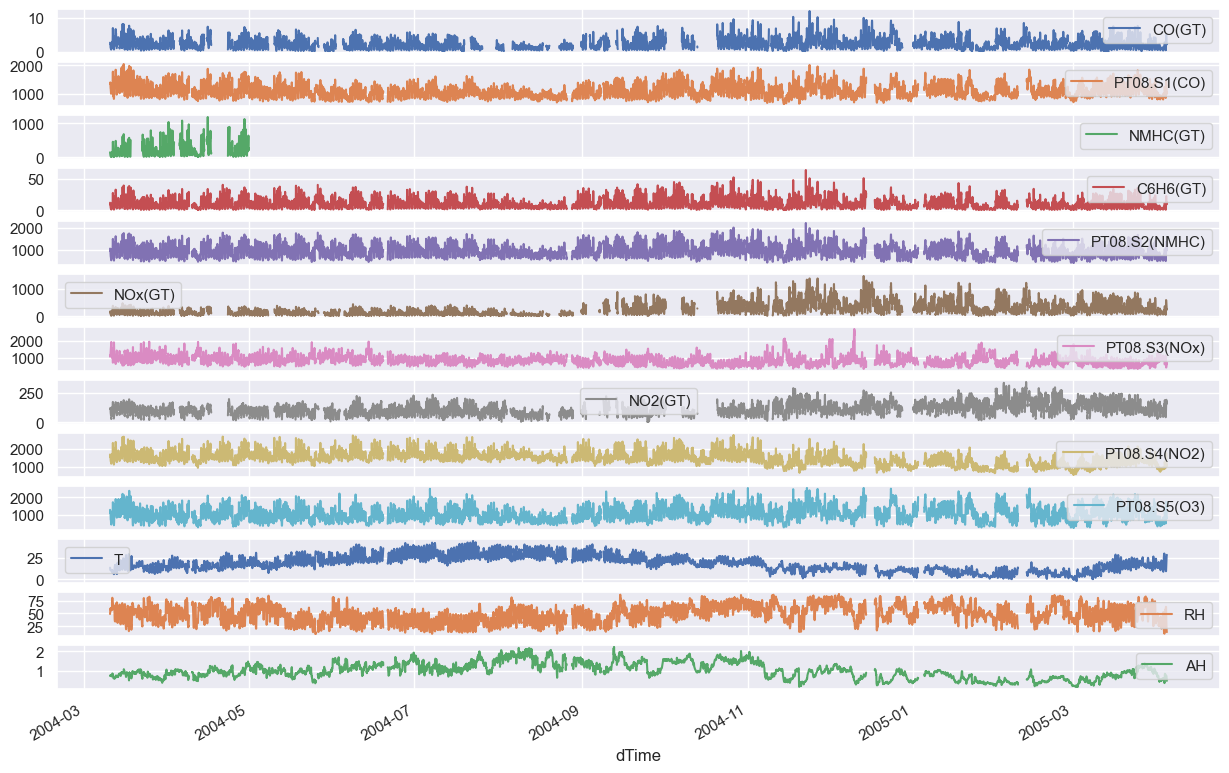

In [216]:
df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 
    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']].plot(subplots=True, figsize=(15,10));

<AxesSubplot:>

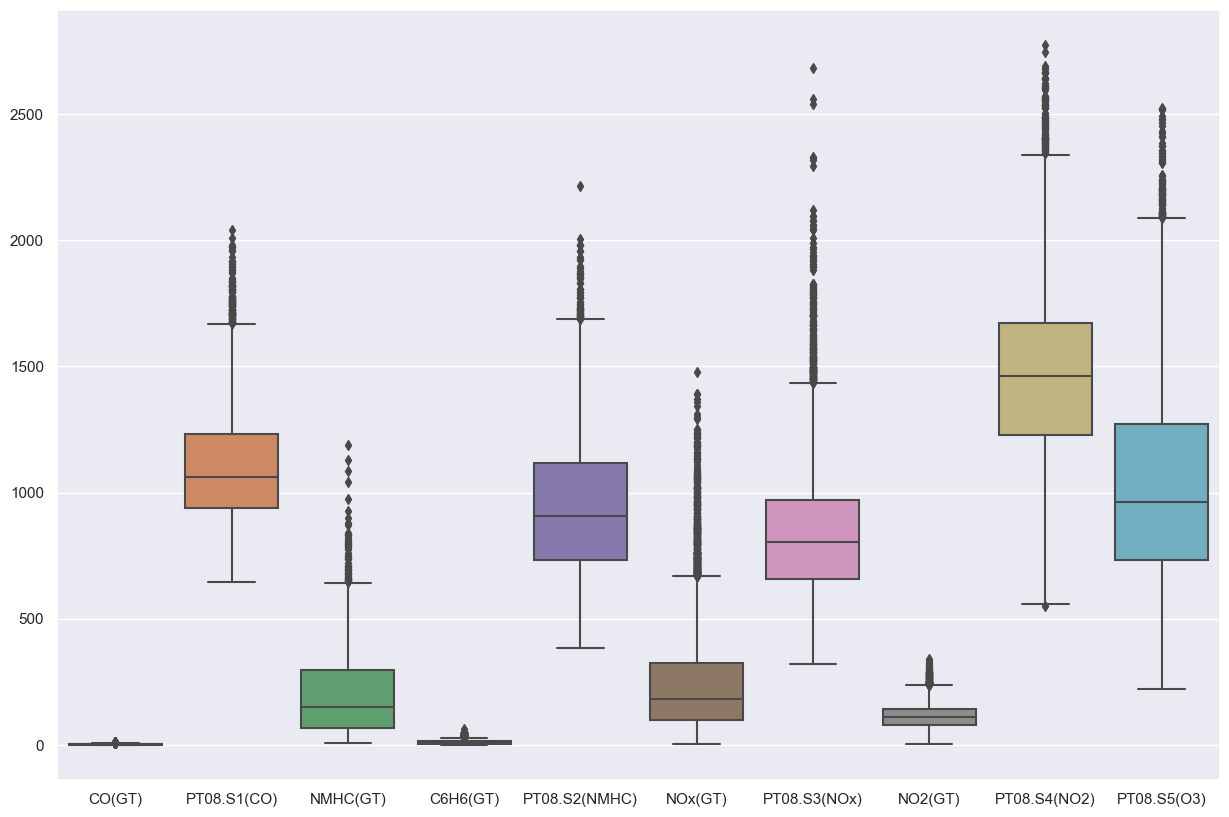

In [217]:
# Look at boxplots for all the chemicals
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
                     'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 
                     'PT08.S4(NO2)', 'PT08.S5(O3)']])

<AxesSubplot:title={'center':'Absolute Humidity Over Time'}, xlabel='dTime'>

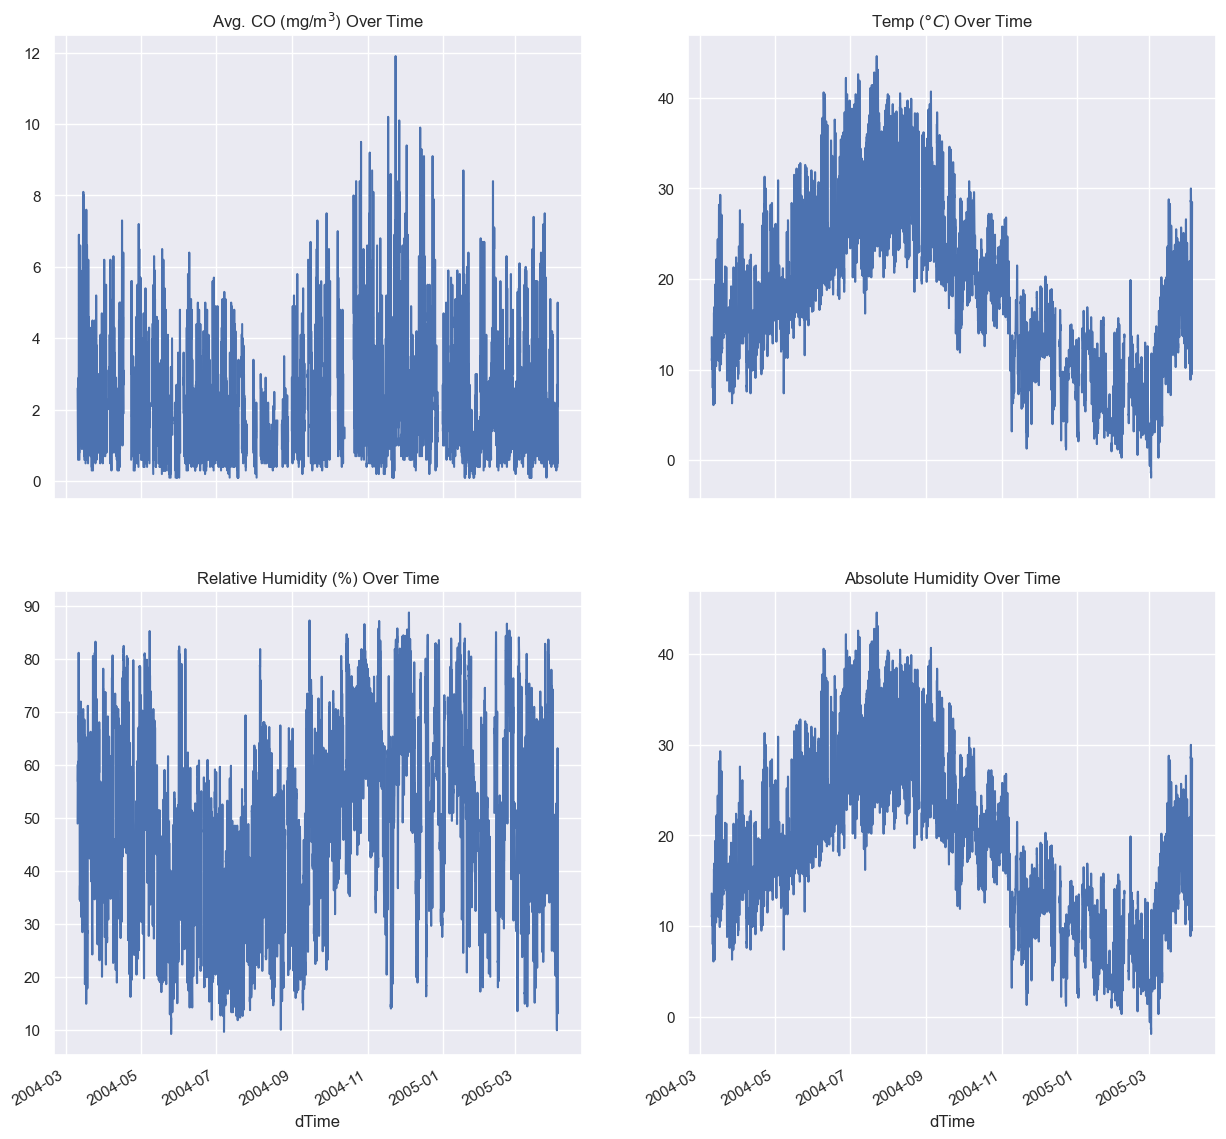

In [218]:
fig, axs = plt.subplots(2,2, figsize=(15,15), sharex=True)
df.plot(y='CO(GT)',
        use_index=True,
        title='Avg. CO (mg/m$^3$) Over Time',
        ax=axs[0,0], legend=False)

df.plot(y='T',
        use_index=True,
        title='Temp ($°C$) Over Time',
        ax=axs[0,1], legend=False)

df.plot(y='RH',
        use_index=True,
        title='Relative Humidity (%) Over Time',
        ax=axs[1,0], legend=False)

df.plot(y='T',
        use_index=True,
        title='Absolute Humidity Over Time',
        ax=axs[1,1], legend=False)

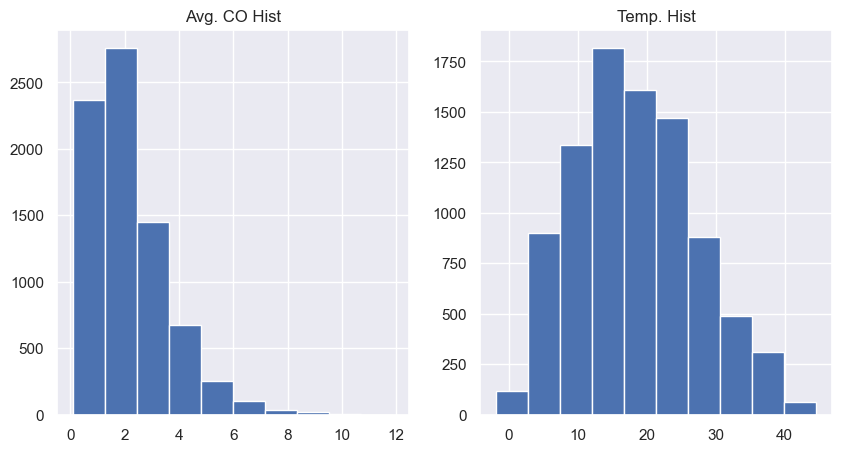

In [219]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
df['CO(GT)'].hist(ax=axs[0])
axs[0].set_title("Avg. CO Hist")
df['T'].hist(ax=axs[1])
axs[1].set_title("Temp. Hist")
plt.show();

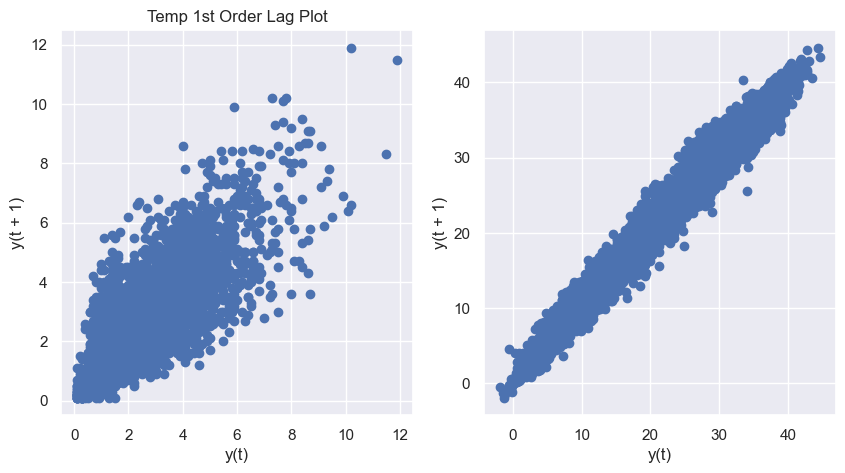

In [220]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
pd.plotting.lag_plot(df['CO(GT)'], lag=1, ax=axs[0])
# pd.plotting.lag_plot(df['CO(GT)'], lag=10, ax=axs[0], c='red')
# pd.plotting.lag_plot(df['CO(GT)'], lag=24, ax=axs[0], c='purple')
axs[0].set_title("CO 1st Order Lag Plot")
pd.plotting.lag_plot(df['T'], lag=1, ax=axs[1])
# pd.plotting.lag_plot(df['T'], lag=10, ax=axs[1], c='red')
# pd.plotting.lag_plot(df['T'], lag=24, ax=axs[1], c='purple')
# pd.plotting.lag_plot(df['T'], lag=5500, ax=axs[1], c='purple')

axs[0].set_title("Temp 1st Order Lag Plot");

Linear relationship in Temp is expected.  Would be odd if there wasn't a correlation like this in temperature.  Linear shape indicates an autoregressive model is preferred.


Lets also look for some possible trends on different timescales.  First need to actually create the requisite features from our dTime index.  Let's make it a function so that we can use it on our training/testing models more easily later.

In [221]:
def makeTimeFeatures(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    # df['year'] = df.index.year # Not required here, data range too small
    df['dayofyear'] = df.index.dayofyear
    return df

In [222]:
makeTimeFeatures(df)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,dayofweek,quarter,month,dayofyear
dTime,,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,2,1,3,70
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,2,1,3,70
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,2,1,3,70
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,2,1,3,70
2004-03-10 23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,23,2,1,3,70


Text(0.5, 1.0, 'Temp. by Day of Week')

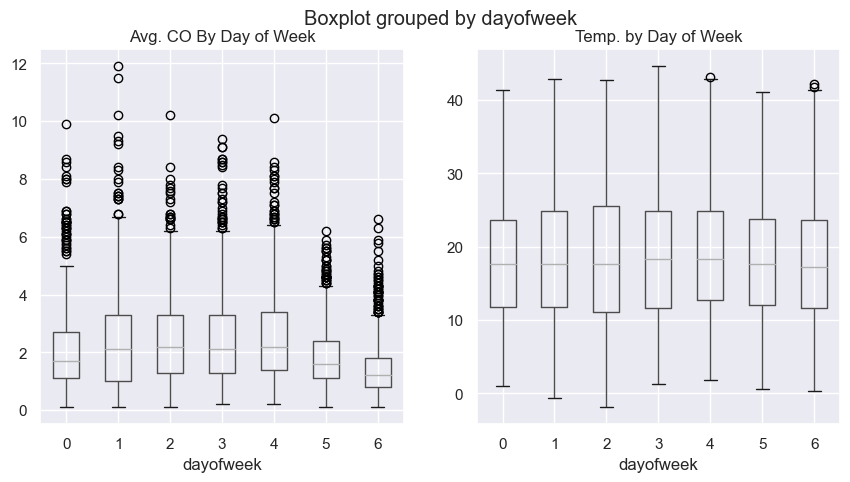

In [223]:
# Prev. plots dealt with time of year, lets look at time of day here.
fig, axs = plt.subplots(1,2, figsize=(10,5))
df.boxplot('CO(GT)', by = 'dayofweek', ax=axs[0])
axs[0].set_title("Avg. CO By Day of Week")
df.boxplot('T', by='dayofweek', ax=axs[1])
axs[1].set_title("Temp. by Day of Week")

Lets do some more plots, but looking only at CO(GT) at various timescales

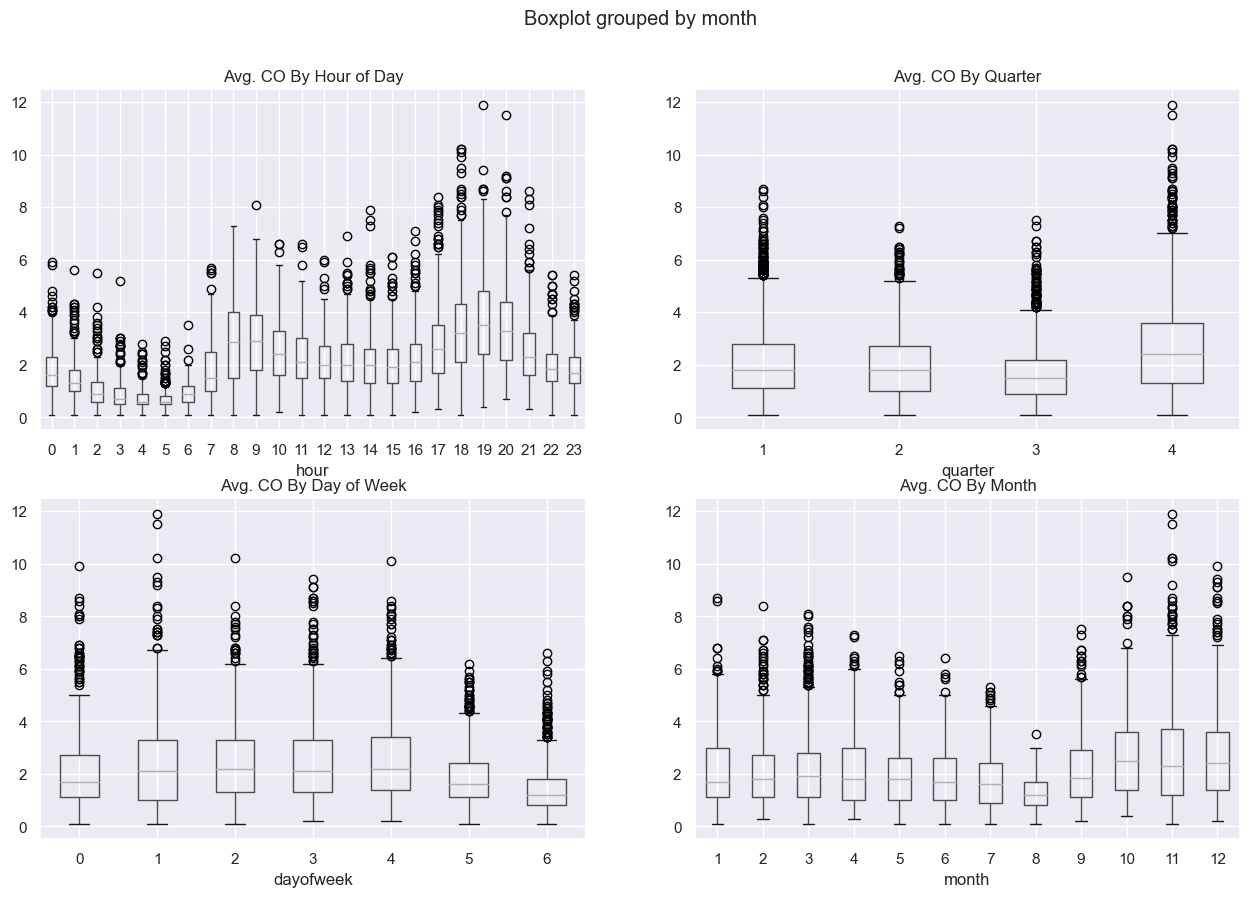

In [224]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

df.boxplot('CO(GT)', by = 'hour', ax=axs[0,0])
axs[0,0].set_title("Avg. CO By Hour of Day")

df.boxplot('CO(GT)', by = 'dayofweek', ax=axs[1,0])
axs[1,0].set_title("Avg. CO By Day of Week")

df.boxplot('CO(GT)', by = 'quarter', ax=axs[0,1])
axs[0,1].set_title("Avg. CO By Quarter")

df.boxplot('CO(GT)', by = 'month', ax=axs[1,1])
axs[1,1].set_title("Avg. CO By Month")
plt.show();


After a bit of looking we can make some changes to explore further.  We saw that NMHC(GT) is nearly fully empty.  Nothing to learn from this, so we'll drop that column. 


In [225]:
df.drop('NMHC(GT)', axis = 1, inplace = True)
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,dayofweek,quarter,month,dayofyear
dTime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,2,1,3,70
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,2,1,3,70
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,2,1,3,70
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,2,1,3,70
2004-03-10 23:00:00,1.2,1197.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,23,2,1,3,70


We saw gaps in our plots showing the null values.  These first plots showed us just how much of our values were missing visually.  We can also see this numerically below.  Since we want continuous values for our time series analysis, we must decide how we're going to impute the rows which we will be keeping.  (17.987% of CO(GT) is missing)

In [226]:
df.isnull().sum() 

CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
hour                0
dayofweek           0
quarter             0
month               0
dayofyear           0
dtype: int64

In [227]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
knnCopy = df.copy()

knnImputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')  # Default metric, start with k=5 and check results
impCO = knnImputer.fit_transform(knnCopy[["CO(GT)"]])
knnCopy['CO'] = impCO

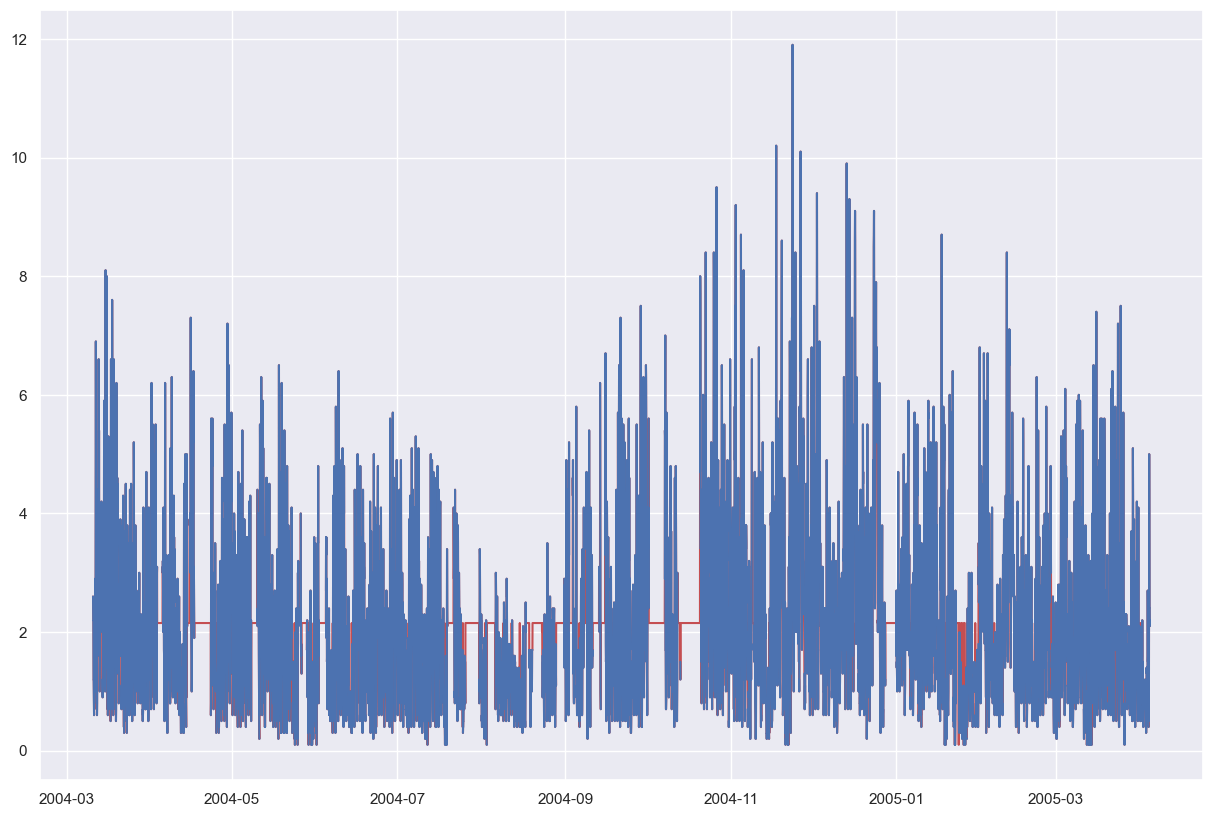

In [228]:
# Red shows what has been imputed.  Looks reasonable to me!
plt.plot(knnCopy['CO'], color = 'r')
plt.plot(knnCopy['CO(GT)'], color = 'b')
plt.show()


In [229]:
df['CO(GT)'] = knnCopy['CO']  # Replace our CO(GT) missing values with the imputed values.

In [230]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,dayofweek,quarter,month,dayofyear
dTime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,2,1,3,70
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,2,1,3,70
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,2,1,3,70
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,2,1,3,70
2004-03-10 23:00:00,1.2,1197.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,23,2,1,3,70


Now our Average CO values are continuous.

Lets do some outlier analysis.

<AxesSubplot:ylabel='Frequency'>

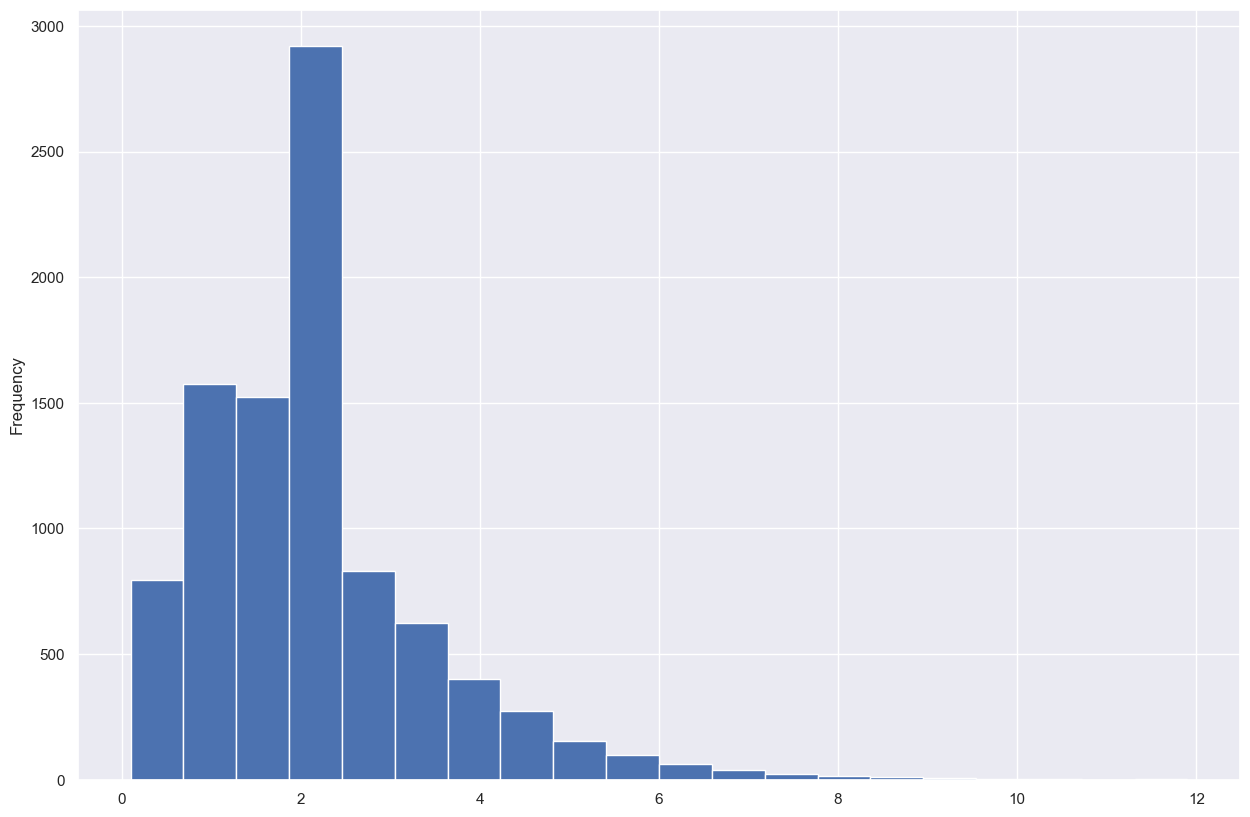

In [231]:
df['CO(GT)'].plot(kind='hist', bins=20)

<AxesSubplot:xlabel='dTime'>

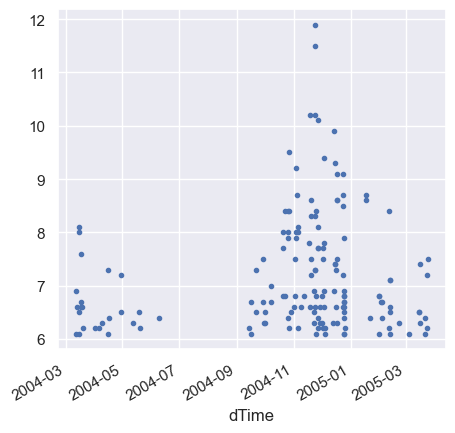

In [232]:
# Check the high values, see if outliers make sense.
df.query('`CO(GT)` > 6')['CO(GT)'].plot(figsize=(5,5), style='.')

While these values are quite high, it does seem to build up to a peak before hand and build down afterwards.  I don't have enough domain knowledge to discount these as outliers to remove, and as such they will remain in our calculations.  I will note though, that these are highly probable to be removable and they sit past even the 99<sup>th</sup> percentile of CO(GT) values (which is 6.6).

In [233]:
df['CO(GT)'].quantile([0.99])

0.99    6.6
Name: CO(GT), dtype: float64

Data seems in good enough shape to do some modeling on our Average CO data.  So lets do so, using XGBoost and comapring to sklearn's SGDRegressor.  

Also lets save this df as a csv called 'imputedCOData.csv'

In [234]:
df.to_csv(r"data/imputedCOData.csv")

In [235]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In splitting our data, it would be nice if we had multiple years' worth and could split by year to try to find those seasonal trends that we may expect.  Unfortunately, we have but one year of data.  We also don't have any obvious other splits (such as geographic regions) so instead we will split the data into training and testing sets with both sklearn's TimeSeriesSplit to make sure we aren't training on future data, and with a set date to split on.  We will be examining the average CO as our target of interest.  In total we will examine four models:  
|Split|Regressor|
| --- | --- | 
|Cut at 80% of time| SGDRegressor|
|Cut at 80% of time| XGBoost|
|TimeSeriesSplit|SGDRegressor|
|TimeSeriesSplit|XGBoost|

### First, the cut at 80% of time with XGBoost Regressor

0.8008764429243266


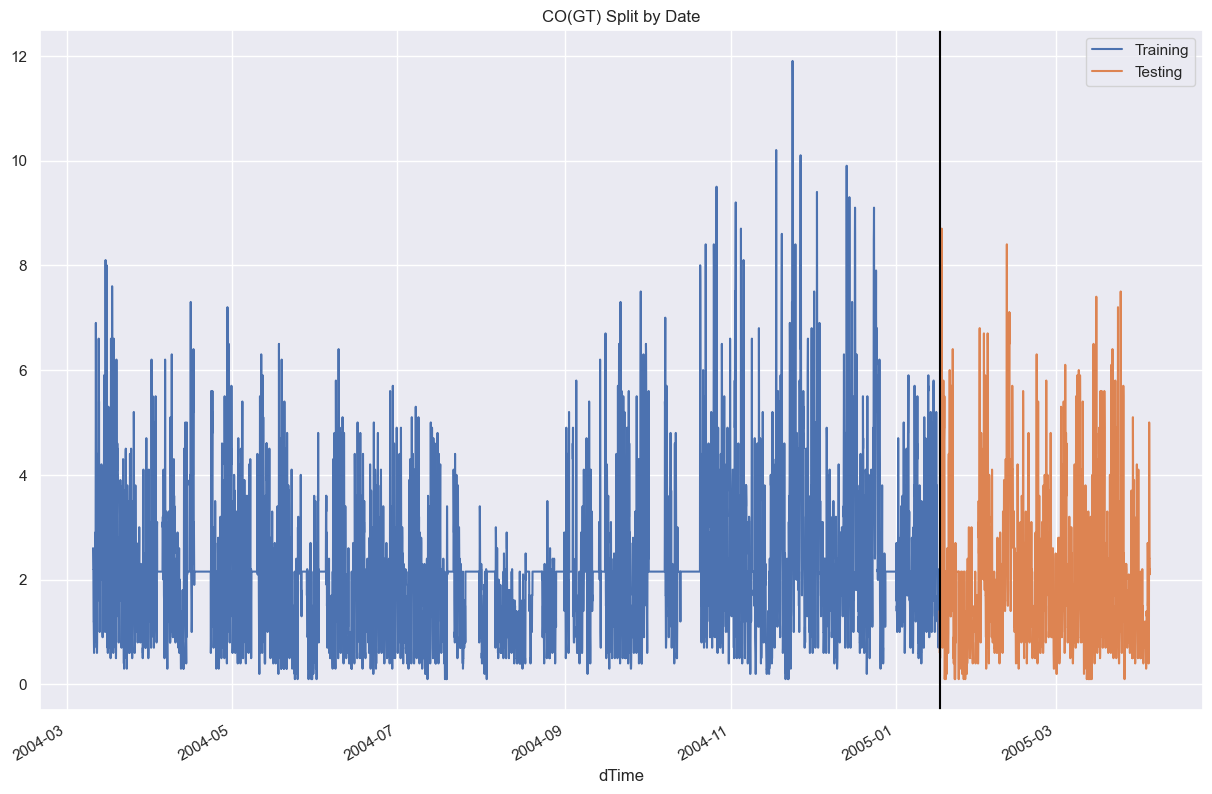

In [236]:
print(len(df.iloc[df.index < '2005-01-17']) / len(df))
train = df.loc[df.index < '2005-01-17']
test = df.loc[df.index >= '2005-01-17']
fig, ax = plt.subplots(figsize=(15,10))
train['CO(GT)'].plot(ax=ax, label='Training', title="CO(GT) Split by Date")
test['CO(GT)'].plot(ax=ax, label='Testing')
ax.axvline('2005-01-17', color = 'black')
ax.legend(['Training', 'Testing'])
plt.show()

In [237]:
X_train = train.drop('CO(GT)', axis=1)
y_train = train['CO(GT)']

X_test = test.drop('CO(GT)', axis=1)
y_test = test['CO(GT)']

In [238]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate = 0.01)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)

[0]	validation_0-rmse:2.12047	validation_1-rmse:1.97743
[5]	validation_0-rmse:2.02325	validation_1-rmse:1.88396
[10]	validation_0-rmse:1.93099	validation_1-rmse:1.79836
[15]	validation_0-rmse:1.84342	validation_1-rmse:1.71721
[20]	validation_0-rmse:1.76013	validation_1-rmse:1.64117
[25]	validation_0-rmse:1.68081	validation_1-rmse:1.56964
[30]	validation_0-rmse:1.60564	validation_1-rmse:1.50227
[35]	validation_0-rmse:1.53429	validation_1-rmse:1.43950
[40]	validation_0-rmse:1.46660	validation_1-rmse:1.37823
[45]	validation_0-rmse:1.40229	validation_1-rmse:1.32096
[50]	validation_0-rmse:1.34132	validation_1-rmse:1.26798
[55]	validation_0-rmse:1.28346	validation_1-rmse:1.21852
[60]	validation_0-rmse:1.22862	validation_1-rmse:1.17069
[65]	validation_0-rmse:1.17669	validation_1-rmse:1.12634
[70]	validation_0-rmse:1.12743	validation_1-rmse:1.08479
[75]	validation_0-rmse:1.08076	validation_1-rmse:1.04588
[80]	validation_0-rmse:1.03651	validation_1-rmse:1.01020
[85]	validation_0-rmse:0.99465	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature Importance'}>

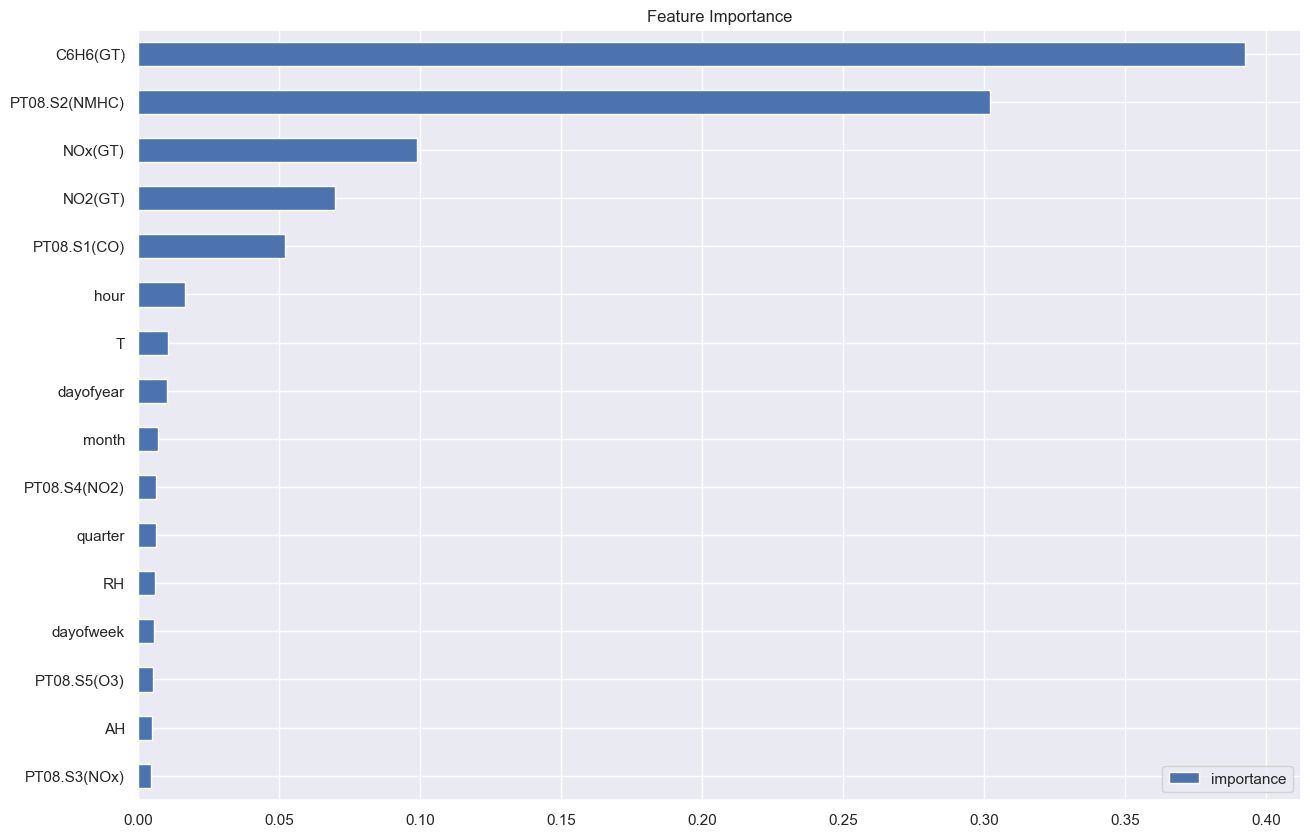

In [239]:
fImport = pd.DataFrame(reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
fImport.sort_values('importance').plot(kind='barh', title='Feature Importance')

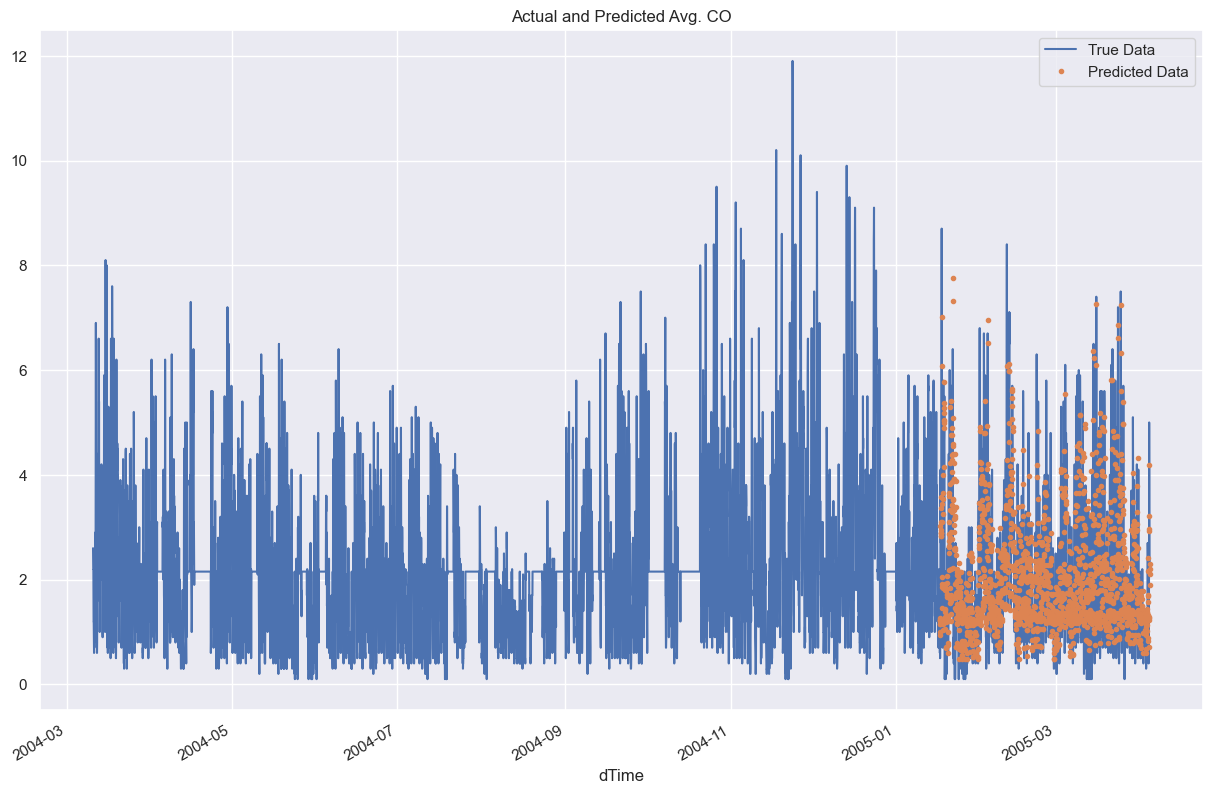

In [240]:
#  Forecast on Test with this model
test['predictions'] = reg.predict(X_test)  # Set our predictions as a column in test
df_merged = df.merge(test['predictions'], how='left', left_index=True, right_index=True)  # Merge our prediction column into our original df
ax = df[['CO(GT)']].plot(figsize=(15,10))  # Plot our original values along with the predicted values from our model
df_merged['predictions'].plot(ax=ax, style='.')
ax.set_title("Actual and Predicted Avg. CO")
plt.legend(["True Data", "Predicted Data"])
plt.show();

Lets look at a smaller timeframe to better see our fit

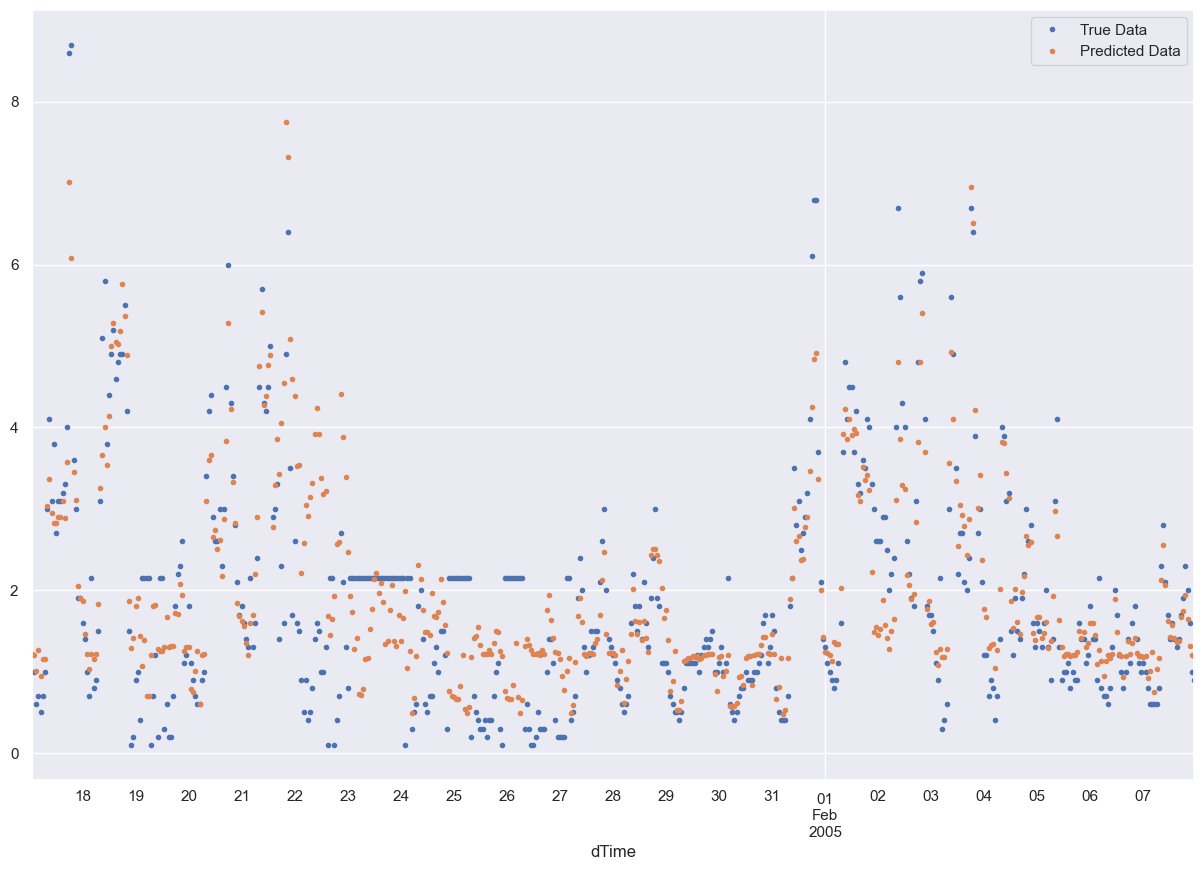

In [241]:
ax = df_merged.loc[(df_merged.index > '2005-01-17') & (df_merged.index < '2005-02-08')]['CO(GT)'].plot(figsize=(15,10), style='.')
df_merged.loc[(df_merged.index > '2005-01-17') & (df_merged.index < '2005-02-08')]['predictions'].plot(style='.')
plt.legend(['True Data', 'Predicted Data'])
plt.show()

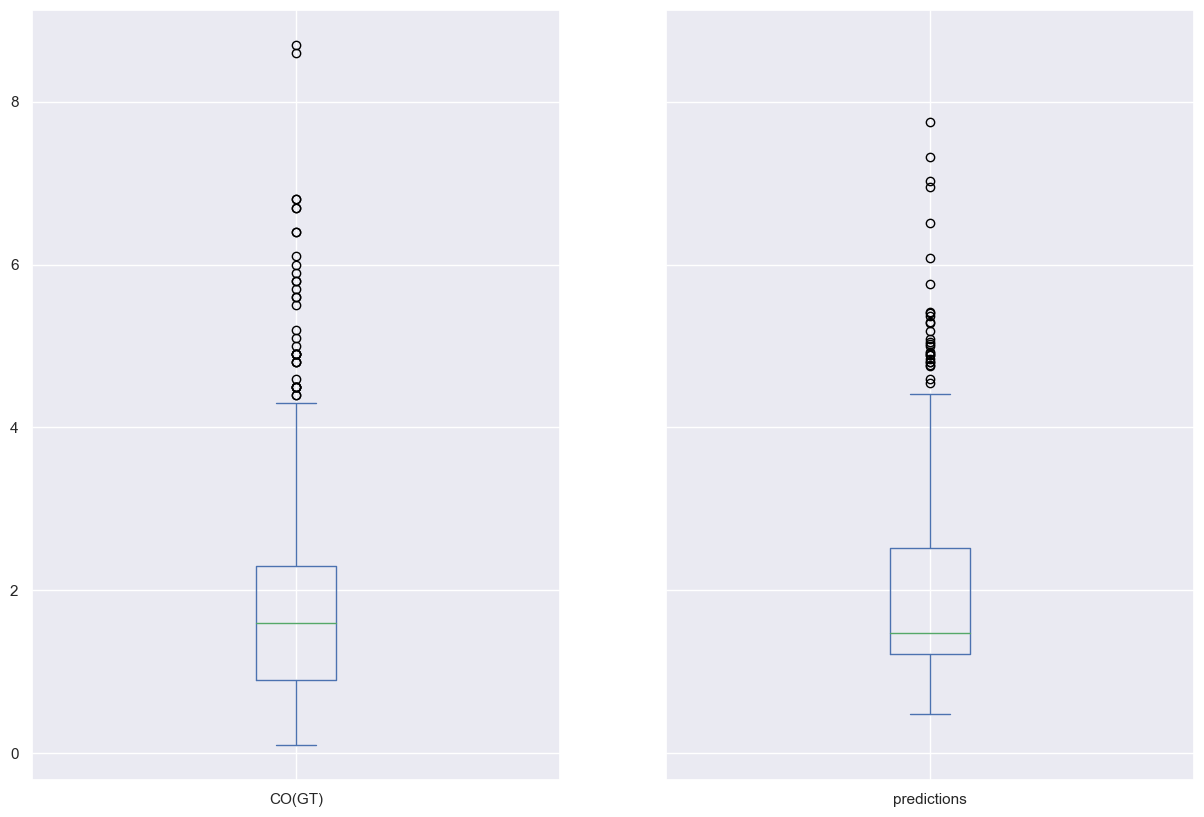

In [242]:
fig, axes = plt.subplots(1,2,sharey=True)
df_merged.loc[(df_merged.index > '2005-01-17') & (df_merged.index < '2005-02-08')]['CO(GT)'].plot.box(figsize=(15,10), ax=axes[0])
df_merged.loc[(df_merged.index > '2005-01-17') & (df_merged.index < '2005-02-08')]['predictions'].plot.box(ax=axes[1])
# plt.legend(['True Data', 'Predicted Data'])
plt.show()

### Time series cross validation with TimeSeriesSplit

In [258]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*24, gap=24) # test_size makes sure we get roughly 20% of data into training
dfSorted = df.sort_index()  # Ensure df is sorted on the index

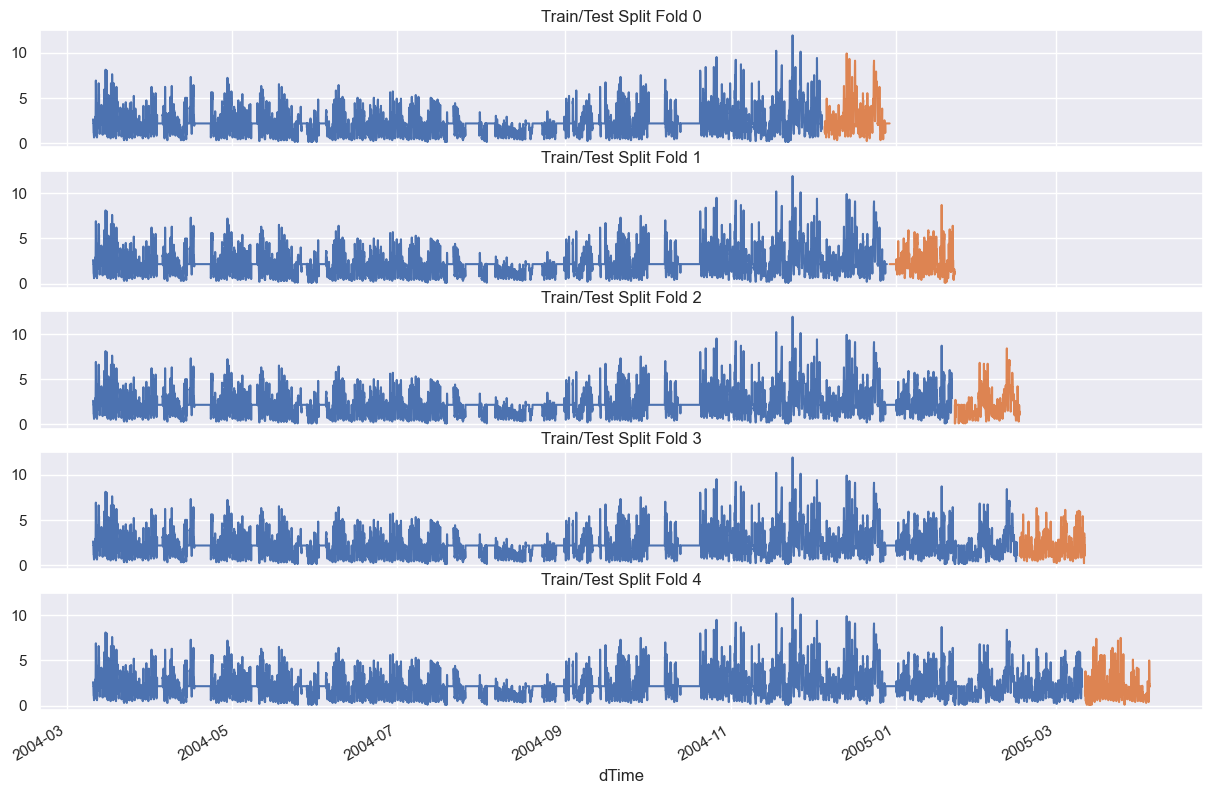

In [259]:
fig, axes = plt.subplots(5, 1, figsize=(15,10), sharex=True)
fold = 0 # Tracking for plotting
for train_idx, val_idx in tss.split(df):
    train = dfSorted.iloc[train_idx]
    test = dfSorted.iloc[val_idx]
    train['CO(GT)'].plot(ax=axes[fold], label='Training', title=f"Train/Test Split Fold {fold}")
    test['CO(GT)'].plot(ax=axes[fold], label='Testing')
    
    fold+=1 # Increment for counting/plotting

Our forcasting horizon is still about 3 months, so it's short-term.

Lets add some lag features.  (looking at target [x] days into the past where [x] is the time delta we provide)

In [245]:
def add_lags(df, listOfLags, target='CO(GT)'):
    """Add lag features with a time delta of each value from the listOfLags

    Args:
        df (dataframe): The df we want to add our lag features to
        listOfLags (list): The list of time deltas we wish to add in days
        target (string): The target we wish to use as the map for our lag features.  Default to 'CO(GT)' 
    """

    target_map = df[target].to_dict()
    for val in listOfLags:
        df[f"lag{val}"] = (df.index - pd.Timedelta(f"{val} days")).map(target_map)
    return df

In [246]:
lagList = [1, 10, 15, 30]
add_lags(df, lagList)
df.tail()


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,...,AH,hour,dayofweek,quarter,month,dayofyear,lag1,lag10,lag15,lag30
dTime,,,,,,,,,,,,,,,,,,,,,
2005-04-04 10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,...,0.7568,10,0,2,4,94,1.4,2.7,1.5,1.1
2005-04-04 11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,...,0.7119,11,0,2,4,94,1.3,1.6,2.4,1.1
2005-04-04 12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,...,0.6406,12,0,2,4,94,1.4,1.4,1.6,1.5
2005-04-04 13:00:00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,...,0.5139,13,0,2,4,94,1.0,2.3,1.2,1.6
2005-04-04 14:00:00,2.2,1071.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,...,0.5028,14,0,2,4,94,1.0,2.1,0.9,2.2


In [247]:
pd.options.mode.chained_assignment = None  # We overwrite the reference so this warning has no meaning here
tss = TimeSeriesSplit(n_splits=5, test_size=24*24)  # Again no gap here, can play around with adding e.g. a 24hr gap with gap=24
df = df.sort_index()  # Ensure index is sorted

fold = 0  # For counting the fold
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    
    train = makeTimeFeatures(train)
    test = makeTimeFeatures(test)
    
    # featuresToUse = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
    #                  'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'hour', 
    #                  'dayofweek', 'quarter', 'month', 'dayofyear', 'lag1', 'lag10', 'lag15', 'lag30']  # Full feature list to use in future, for now we want only date info.
                    
    featuresToUse = ['hour', 'dayofweek', 'quarter', 'month', 'dayofyear', 'lag1', 'lag10', 'lag15', 'lag30']
    
    targetToUse = 'CO(GT)'
    
    X_train = train[featuresToUse]
    y_train = train[targetToUse]
    X_test = test[featuresToUse]
    y_test = test[targetToUse]
    
    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=1000, early_stopping_rounds=50)  # Plenty more to play aroudn with with hparams
    
    reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose = 50)
    
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)
pd.options.mode.chained_assignment = 'warn'  # Reset warning

[0]	validation_0-rmse:1.58261	validation_1-rmse:2.19092
[50]	validation_0-rmse:0.45574	validation_1-rmse:1.76856
[54]	validation_0-rmse:0.44286	validation_1-rmse:1.76758
[0]	validation_0-rmse:1.63488	validation_1-rmse:1.81613
[50]	validation_0-rmse:0.48496	validation_1-rmse:1.28679
[59]	validation_0-rmse:0.45253	validation_1-rmse:1.32204
[0]	validation_0-rmse:1.64827	validation_1-rmse:1.61790
[50]	validation_0-rmse:0.49079	validation_1-rmse:1.41457
[53]	validation_0-rmse:0.47929	validation_1-rmse:1.42107
[0]	validation_0-rmse:1.64655	validation_1-rmse:1.40942
[50]	validation_0-rmse:0.51097	validation_1-rmse:0.81666
[67]	validation_0-rmse:0.45840	validation_1-rmse:0.82007
[0]	validation_0-rmse:1.63112	validation_1-rmse:1.54516
[50]	validation_0-rmse:0.52108	validation_1-rmse:0.90972
[88]	validation_0-rmse:0.40461	validation_1-rmse:0.91865


In [248]:
print(f"Avg. score across folds: {np.mean(scores)}")
print(f"All fold scores: {scores}")

Avg. score across folds: 1.0932879252545646
All fold scores: [1.5283168365633346, 1.0705345497934984, 1.1697265436999262, 0.8050740924390377, 0.8927876037770257]


When forcasting in to the future, we want to leverage ALL of our data.  Do so below.

In [249]:
pd.options.mode.chained_assignment = None  # We overwrite the reference so this warning has no meaning here
# featuresToUse = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
                    #  'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'hour', 
                    #  'dayofweek', 'quarter', 'month', 'dayofyear', 'lag1', 'lag10', 'lag15', 'lag30']  # Full feature list to use in future, for now we want only date info.
                    
featuresToUse = ['hour', 'dayofweek', 'quarter', 'month', 'dayofyear', 'lag1', 'lag10', 'lag15', 'lag30']
    
targetToUse = 'CO(GT)'
    
X_all = df[featuresToUse]
y_all = df[targetToUse]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=1000, early_stopping_rounds=50)  # Plenty more to play aroudn with with hparams
    
reg.fit(X_all, y_all, eval_set=[(X_all, y_all)], verbose = 50)


[0]	validation_0-rmse:1.62513
[50]	validation_0-rmse:0.54058
[100]	validation_0-rmse:0.39366
[150]	validation_0-rmse:0.31633
[200]	validation_0-rmse:0.25976
[250]	validation_0-rmse:0.21786
[300]	validation_0-rmse:0.18726
[350]	validation_0-rmse:0.16099
[400]	validation_0-rmse:0.14300
[450]	validation_0-rmse:0.12509
[500]	validation_0-rmse:0.11018
[550]	validation_0-rmse:0.09745
[600]	validation_0-rmse:0.08662
[650]	validation_0-rmse:0.07623
[700]	validation_0-rmse:0.06895
[750]	validation_0-rmse:0.06261
[800]	validation_0-rmse:0.05640
[850]	validation_0-rmse:0.05063
[900]	validation_0-rmse:0.04539
[950]	validation_0-rmse:0.04078
[999]	validation_0-rmse:0.03647


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Make the future df, add an 'isFuture' flag, concat with the original so as to add the lags more easily, add the time features, then select only the ones with the flag.  

In [250]:
print(df.index.max())
future = pd.date_range('2005-04-04', '2005-05-04', freq = '1h')  # Create future dataframe, going out three months from our original last date with a freq. of 1h
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True  # Flag for when we concat dataframes
df['isFuture'] = False
df_with_future = pd.concat([df, future_df])
df_with_future = makeTimeFeatures(df_with_future)
df_with_future = add_lags(df_with_future, listOfLags=[1, 10, 15, 30])

2005-04-04 14:00:00


In [251]:
future_with_features = df_with_future.query('isFuture').copy()  # Select the future columns
future_with_features[['CO(GT)', 'hour', 'dayofweek', 'quarter', 'month', 'dayofyear', 'lag1', 'lag10', 'lag15', 'lag30', 'isFuture']]  # Don't need other columns here, select only target and date info

,CO(GT),hour,dayofweek,quarter,month,dayofyear,lag1,lag10,lag15,lag30,isFuture
2005-04-04 00:00:00,NaN,0,0,2,4,94,0.8,2.0,1.900000,2.200000,True
2005-04-04 01:00:00,NaN,1,0,2,4,94,0.8,1.5,1.900000,2.100000,True
2005-04-04 02:00:00,NaN,2,0,2,4,94,0.7,1.0,1.500000,1.700000,True
2005-04-04 03:00:00,NaN,3,0,2,4,94,0.8,1.0,1.100000,1.500000,True
2005-04-04 04:00:00,NaN,4,0,2,4,94,0.5,0.9,2.152769,2.152769,True
...,...,...,...,...,...,...,...,...,...,...,...
2005-05-03 20:00:00,NaN,20,1,2,5,123,NaN,NaN,NaN,2.500000,True
2005-05-03 21:00:00,NaN,21,1,2,5,123,NaN,NaN,NaN,1.500000,True
2005-05-03 22:00:00,NaN,22,1,2,5,123,NaN,NaN,NaN,1.600000,True
2005-05-03 23:00:00,NaN,23,1,2,5,123,NaN,NaN,NaN,1.200000,True


Now predict on these future values

In [252]:
future_with_features['predicted'] = reg.predict(future_with_features[featuresToUse])

<AxesSubplot:title={'center':'Future Predictions'}>

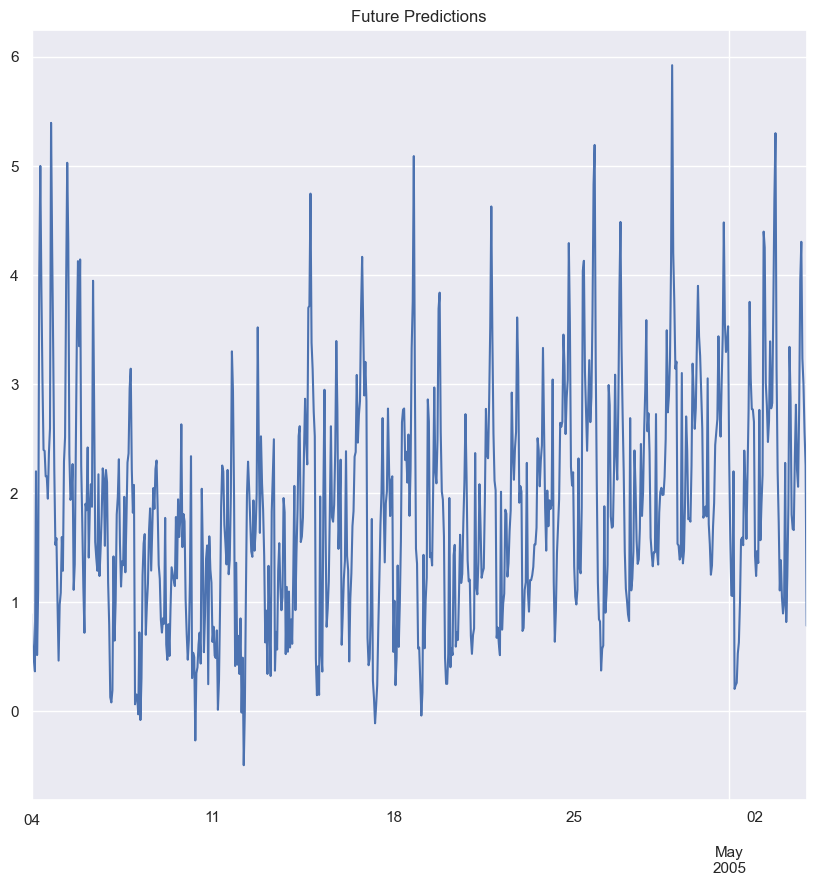

In [253]:
future_with_features['predicted'].plot(figsize=(10,10), title='Future Predictions')

Saving our model

In [254]:
# reg.save_model('airQualModel.json')

Loading model back in

In [255]:
# reg_loaded = xgb.XGBRegressor()
# reg_loaded.load_model('airQualModel.json')

We now have a short-term forecast for the avg. CO in the next three months based on previous avg. CO data and associated temporal features.  With that done in the most basic of senses, there are some things we can add on. 

The first of which is to impute our missing values for our other features (we saw that e.g. C6G6(GT) was extremely important to the model) then create our model with all of the features associated with the data we were given.

The second thing is to do hyperparamter tuning on both this full-featured model and our time/CO only models.  We will start with imputing our missing values below.


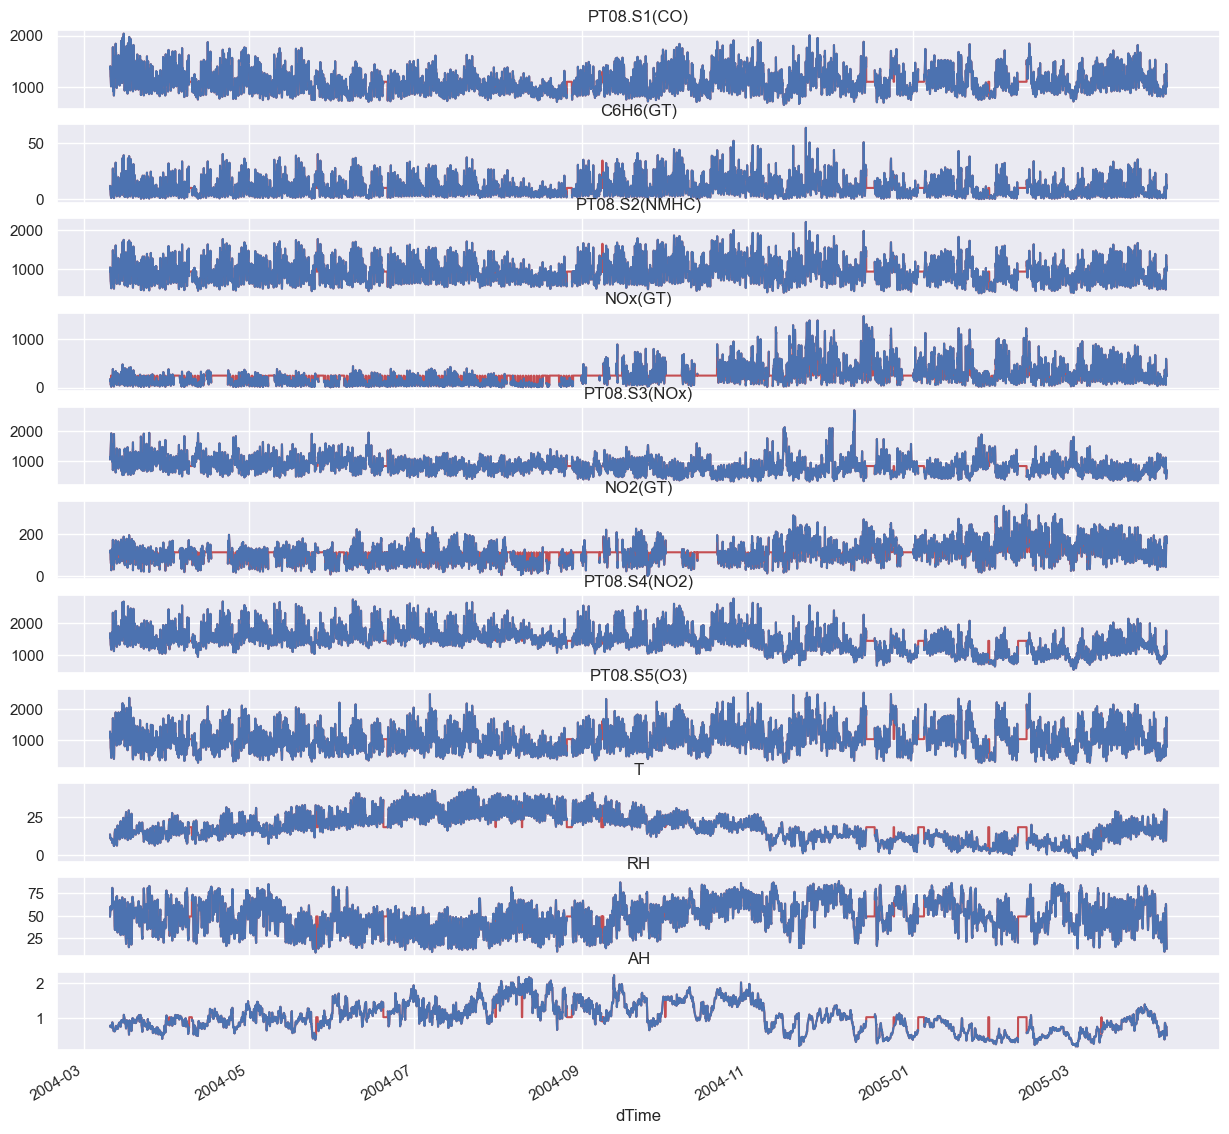

In [256]:
# This cell takes every feature in features_to_impute, imputes the missing values with a KNNImputer, and plots the original (blue) and imputed (red) values for each feature before replacement in df.
fig, axes = plt.subplots(11,1, sharex=True, figsize=(15,15))
i=0
knnCopy = df.copy()
features_to_impute = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
                     'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']  # All the non-lag features with missing values
for feat in features_to_impute:
    knnImputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')  # Default metric
    imp = knnImputer.fit_transform(knnCopy[[feat]])
    knnCopy[f"imp{feat}"] = imp
    
    # Red shows what has been imputed
    knnCopy[f"imp{feat}"].plot(color = 'r', ax=axes[i])
    df[feat].plot(color = 'b', ax=axes[i], title=f"{feat}")
    i+=1
    
    df[feat] = knnCopy[f"imp{feat}"]


Now all of our features which needed to be imputed are, and the imputed values look relatively reasonable so we will leave them as is.  We could play around more with the imputer, or change the way we impute but as it is, it is good enough for us.

Lets now do some hyperparamater tuning with our XGBoost model using all of our features.

XGBoost Hparam Tuning Notes:

General Params:

    booster - default of gbtree, almost certainly what we want. Could try the other ones if we feel like it
    verbosity - keep at 0 for silent
    nthread - default is max # threads available, keep default

Booster Params: (Look only at tree boosters for now, if we end up trying linear model then we can append)

    eta - LR param, aliased with learning_rate.  Gridsearch for optimal value here. default 0.3, typically in 0.01-0.2.
    gamma - Specifie min. loss reduction to make split in tree.  Default at 0, can gridsearch but our losses are already fairly small.
    max_depth - increasing makes overfitting more likely.  Default of 6.  Tune with gridsearch
    min_child_weight - min. sum of weights of all obs req. in a child, controls overfitting, tune with gridsearch
    max_delta_step - max delta for each tree weight est.  useful when class imbalanced apparently? not applicable here, don't use
    subsample - frac. of obs to rand sample for each tree.  too low and it may underfit. can gridsearch
    colsample_byXXX - subsampling columns, won't use here
    lambda - L2 regularization on weights, increasing makes model more conservative (Ridge regression)
    alpha - L1 regularization on weights, use with high dimensionality for speed, increase makes model more conservative (Lasso regression)
    tree_method - default auto chooses based on data size.  seems fine. can set to exact to mandate greedy algo.
    scale_pos_weight - useful with imbalanced classes. not applicable here
    max_leaves - max # nodes, not applicable here

Learning Params:

    objective - the loss func to minimize, default reg:squarederror, keep as default
    eval_metric - default of rmse for regression.  can add multiple. keep as rmse here
    seed - can set for param tuning

Some googling has suggested HYPEROPT to help with searching instead of say, gridsearchCV.  Lets try it below.

In [262]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

We'll be using the first 80% of our data as training and the latter 20% as testing here first.

In [284]:
df = df.sort_index()  # Ensure index is sorted

train = df.loc[df.index < '2005-01-17']
test = df.loc[df.index >= '2005-01-17']

X_train = train.drop(['CO(GT)', 'isFuture'], axis=1)
y_train = train['CO(GT)']

X_test = test.drop(['CO(GT)', 'isFuture'], axis=1)
y_test = test['CO(GT)']

space={'eta' : hp.uniform('eta', 0.01, 0.2),
       'gamma' : hp.quniform('gamma', 1, 9, 1),
       'max_depth' : hp.quniform('max_depth', 3, 9, 1),
       'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
       'n_estimators' : 150,
       'seed' : 543,
       'early_stopping_rounds' : 20
       }

def objective(space):
    clf=xgb.XGBRegressor(n_estimators=space['n_estimators'], max_depth=int(space['max_depth']), gamma=int(space['gamma']),
                            eta=space['eta'], min_child_weight=int(space['min_child_weight']))

    evaluation = [(X_train, y_train), (X_test, y_test)]
    
    clf.fit(X_train, y_train, eval_set=evaluation)
    pred = clf.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, pred))
    print(f"Score: {score}")
    return {'loss': score, 'status': STATUS_OK}

trials = Trials()

best_hparams = fmin(fn = objective,
                    space = space,
                    algo = tpe.suggest,
                    max_evals = 100,
                    trials = trials)

[0]	validation_0-rmse:1.84666	validation_1-rmse:1.73061
[1]	validation_0-rmse:1.59693	validation_1-rmse:1.49857
[2]	validation_0-rmse:1.38590	validation_1-rmse:1.30705
[3]	validation_0-rmse:1.20653	validation_1-rmse:1.16133
[4]	validation_0-rmse:1.05577	validation_1-rmse:1.02756
[5]	validation_0-rmse:0.92846	validation_1-rmse:0.92769
[6]	validation_0-rmse:0.82194	validation_1-rmse:0.84740
[7]	validation_0-rmse:0.73143	validation_1-rmse:0.78708
[8]	validation_0-rmse:0.65764	validation_1-rmse:0.73708
[9]	validation_0-rmse:0.59732	validation_1-rmse:0.70385
[10]	validation_0-rmse:0.54662	validation_1-rmse:0.67801
[11]	validation_0-rmse:0.50619	validation_1-rmse:0.66100
[12]	validation_0-rmse:0.47540	validation_1-rmse:0.65010
[13]	validation_0-rmse:0.44974	validation_1-rmse:0.64358
[14]	validation_0-rmse:0.42955	validation_1-rmse:0.64017
[15]	validation_0-rmse:0.41194	validation_1-rmse:0.63840
[16]	validation_0-rmse:0.39950	validation_1-rmse:0.63632
[17]	validation_0-rmse:0.39120	validation

In [286]:
print(f"The best hparams are: {best_hparams}")

The best hparams are: {'eta': 0.01836815737600145, 'gamma': 3.0, 'max_depth': 9.0, 'min_child_weight': 10.0}
